In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/combined_for_analysis_sensationalism_jargon_categories_domain_labels.csv")
df["log_score"] = np.log(df["score"] + 1)

df.dropna(inplace=True)
df["top_domain"] = "other"
for domain in ["is_top_domain_repo", "is_top_domain_news", "is_top_domain_scientific", "is_top_domain_social_media","is_top_domain_scam"]:
    # set domain column to a value
    df.loc[df[domain], "top_domain"] = " ".join(domain.split("_")[3:])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 197622 entries, 0 to 197786
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  197622 non-null  int64  
 1   year                        197622 non-null  int64  
 2   month                       197622 non-null  int64  
 3   title                       197622 non-null  object 
 4   link_flair_text             197622 non-null  object 
 5   domain                      197622 non-null  object 
 6   score                       197622 non-null  int64  
 7   num_comments                197622 non-null  int64  
 8   sensationalism_score        197622 non-null  float64
 9   jargon_proportion           197622 non-null  float64
 10  is_top_domain_social_media  197622 non-null  bool   
 11  is_top_domain_scientific    197622 non-null  bool   
 12  is_top_domain_news          197622 non-null  bool   
 13  is_top_domain_repo 

,Unnamed: 0,year,month,title,link_flair_text,domain,score,num_comments,sensationalism_score,jargon_proportion,...,is_top_domain_repo,is_top_domain_scam,is_top_domain_unknown,is_top_domain_indecisive,is_top_domain_less_than_2,label_voting_lm,label_voting_manual,top_category,log_score,top_domain
0,0,2018,3,The Bradford pear has created an ecological ni...,Biology,greenvilleonline.com,2,4,0.533427,0.181818,...,False,False,False,False,False,less_than_2,less_than_2,Life Sciences,1.098612,other
1,1,2018,3,Astronomers say they've discovered evidence of...,Astronomy,aftau.org,46,11,0.511129,0.068966,...,False,False,False,False,False,scientific,scientific,Physical Sciences,3.850148,other
2,2,2018,3,The first detection of 21 cm signal from hydro...,Astronomy,news.mit.edu,1,0,0.412405,0.083333,...,False,False,False,False,False,news,news,Physical Sciences,0.693147,other
3,3,2018,3,Universe's First Stars Detected? Get the Facts.,Astronomy,news.nationalgeographic.com,1,1,0.561694,0.000000,...,False,False,False,False,False,news,news,Physical Sciences,0.693147,other
4,4,2018,3,Simple telescope picks up hint of the Universe...,Astronomy,arstechnica.com,3,2,0.492255,0.333333,...,False,False,False,False,False,news,news,Physical Sciences,1.386294,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197782,197782,2019,10,"""Smoker's Face,"" a condition where smokers loo...",Biology,eurekalert.org,45,1,0.568060,0.080000,...,False,False,False,False,False,news,news,Life Sciences,3.828641,news
197783,197783,2019,10,WANTED: Pictures of your poop for science,Health,seed.com,6,11,0.524337,0.142857,...,False,False,False,False,False,less_than_2,less_than_2,Life Sciences,1.945910,other
197784,197784,2019,10,New flame retardants in electronics and childr...,Environment,pubs.acs.org,1,0,0.541337,0.142857,...,True,False,False,False,False,repo,repo,Environmental Sciences,0.693147,repo
197785,197785,2019,10,Memory editing from science fiction to clinica...,Biology,nature.com,10,1,0.447850,0.250000,...,False,False,False,False,False,scientific,scientific,Life Sciences,2.397895,scientific


In [7]:
domain_order_for_hue = ["repo", "scientific", "news", "social_media", "scam"]
selected_categories = ["Medicine", "Engineering", "Economics", "Social Science", "Computer Science", "Epidemiology"]
top_categories_order = ["Life Sciences", "Social Sciences", "Environmental Sciences", "Engineering & Technology", "Physical Sciences"]

# Jargon over different domains and categories

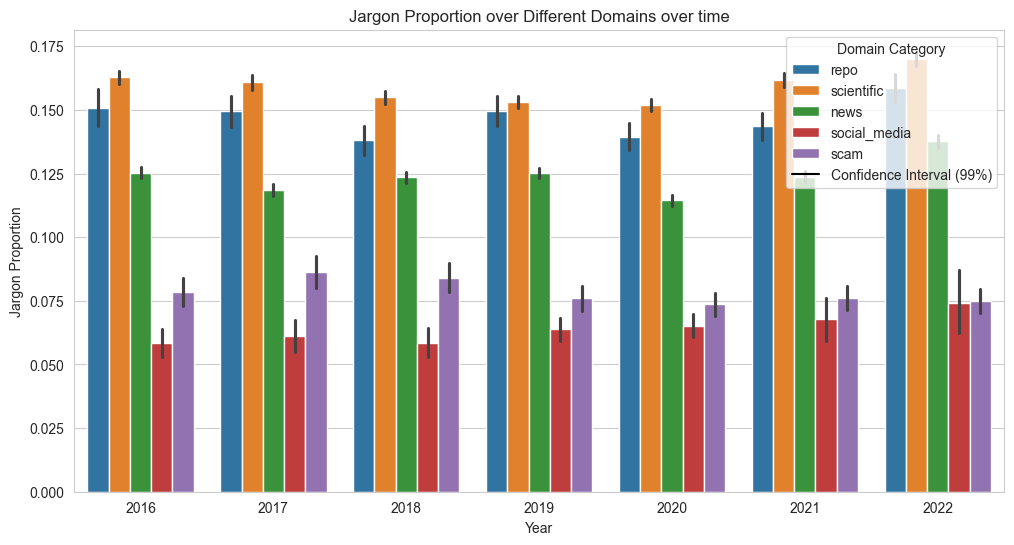

In [4]:
plt.figure(figsize=(12, 6))

sns_plot = sns.barplot(data=df, x = "year", y = "jargon_proportion", hue="label_voting_manual", hue_order=domain_order_for_hue)
plt.title("Jargon Proportion over Different Domains over time")
plt.xlabel("Year")
plt.ylabel("Jargon Proportion")
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
# add line for the jargon proportion trends
#sns.lineplot(data=df, x="year", y="jargon_proportion", hue="label_voting_manual", hue_order=domain_order_for_hue, legend=False)
plt.show()
# TODO regress jargon on the domain

Text(0, 0.5, 'Jargon Proportion')

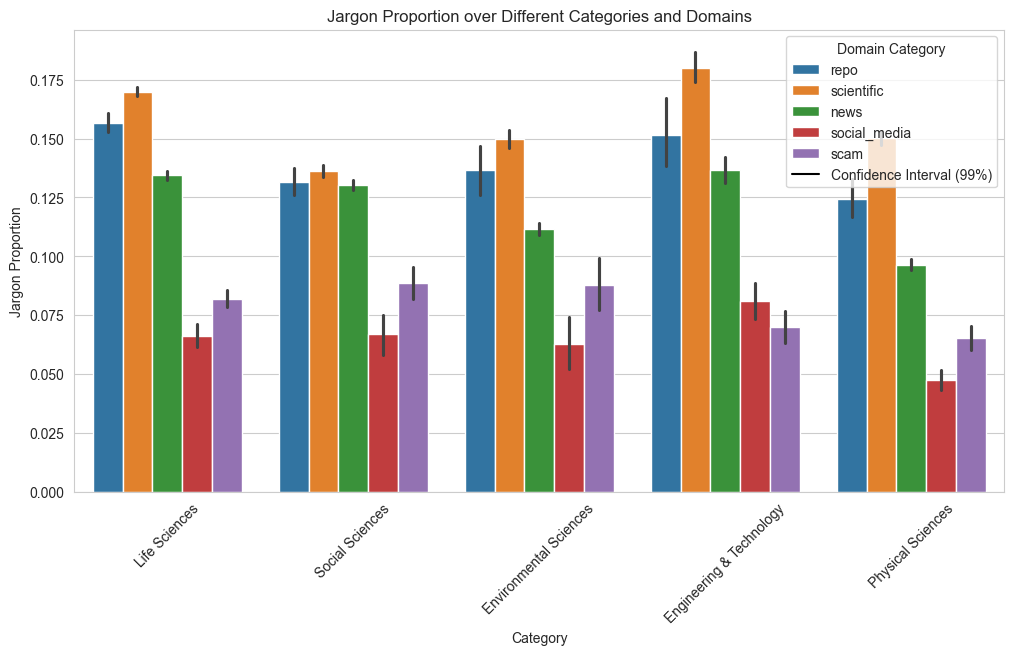

In [5]:
# How does jargon in domains relate over different link flairs
# fig width
plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df, x="top_category", y="jargon_proportion", hue="label_voting_manual",  hue_order=["repo", "scientific", "news", "social_media", "scam"], order=top_categories_order, errorbar=("ci", 99))
plt.xticks(rotation=45)
handles = sns_plot.get_legend_handles_labels()
# add error bars for the 50th percentile to the legend
plt.legend(title="Domain Category", loc="upper right", handles = handles[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.title("Jargon Proportion over Different Categories and Domains")
plt.xlabel("Category")
plt.ylabel("Jargon Proportion")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Medicine'),
  Text(1, 0, 'Engineering'),
  Text(2, 0, 'Economics'),
  Text(3, 0, 'Social Science'),
  Text(4, 0, 'Computer Science'),
  Text(5, 0, 'Epidemiology')])

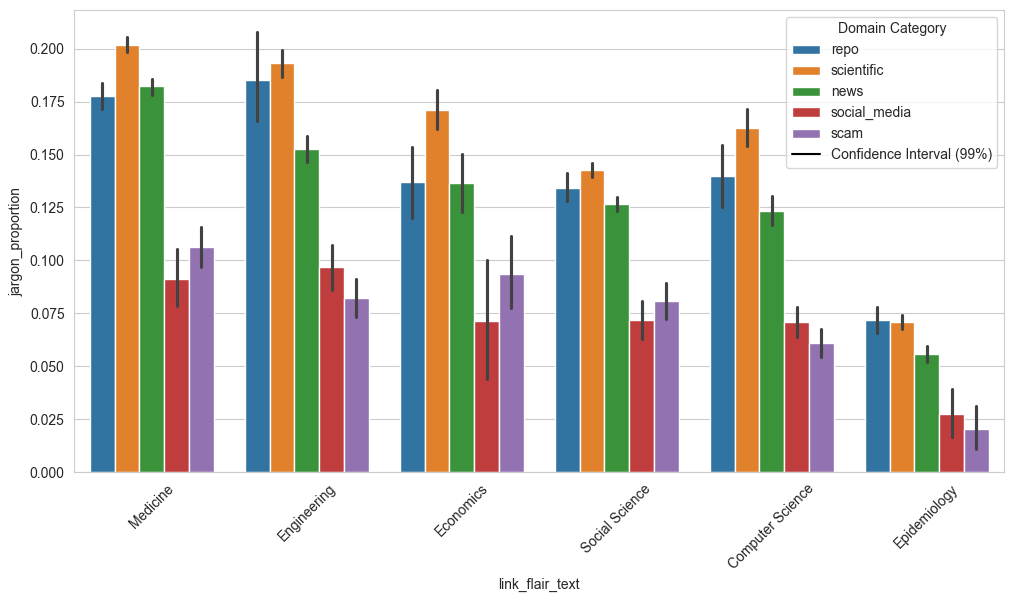

In [6]:

plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df[df["link_flair_text"].isin(selected_categories)], x="link_flair_text", y="jargon_proportion", hue="label_voting_manual",  hue_order=domain_order_for_hue, order=selected_categories)
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Medicine'),
  Text(1, 0, 'Engineering'),
  Text(2, 0, 'Economics'),
  Text(3, 0, 'Social Science'),
  Text(4, 0, 'Computer Science'),
  Text(5, 0, 'Epidemiology')])

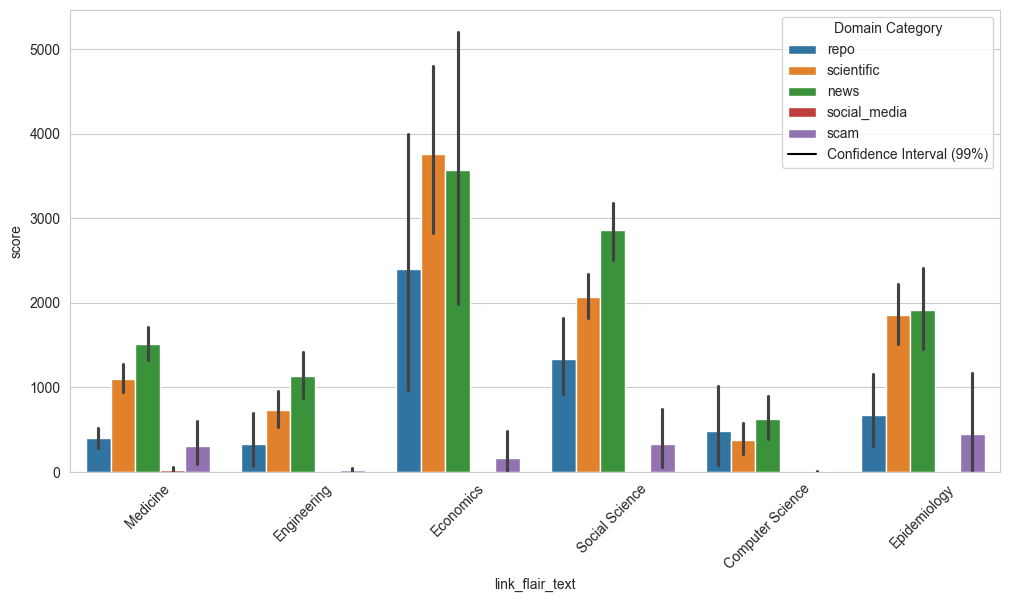

In [7]:

plt.figure(figsize=(12, 6))
sns_plot = sns.barplot(data=df[df["link_flair_text"].isin(selected_categories)], x="link_flair_text", y="score", hue="label_voting_manual",  hue_order=domain_order_for_hue, order=selected_categories)
plt.legend(title="Domain Category", loc="upper right", handles = sns_plot.get_legend_handles_labels()[0] + [plt.Line2D([], [], color="black", label="Confidence Interval (99%)")])
plt.xticks(rotation=45)
# TODO does this also translate to the score?

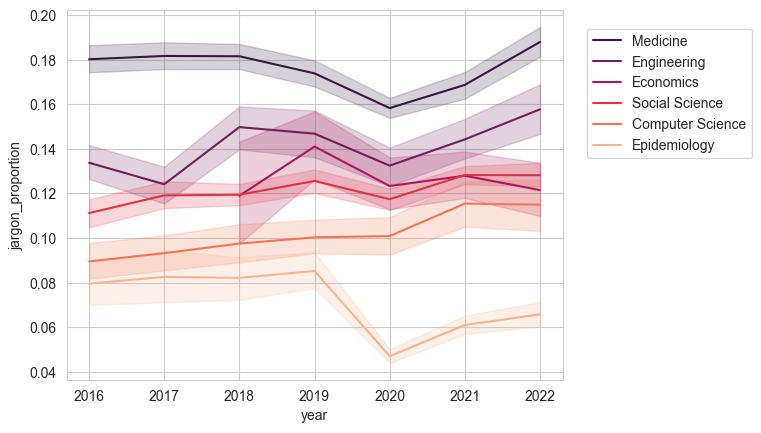

In [8]:
sns_plot = sns.lineplot(data=df, x="year", y="jargon_proportion", hue="link_flair_text", palette ="rocket", hue_order=selected_categories)
sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left', borderaxespad=0.)


# Jargon Development over the years

Text(0, 0.5, 'Jargon Proportion')

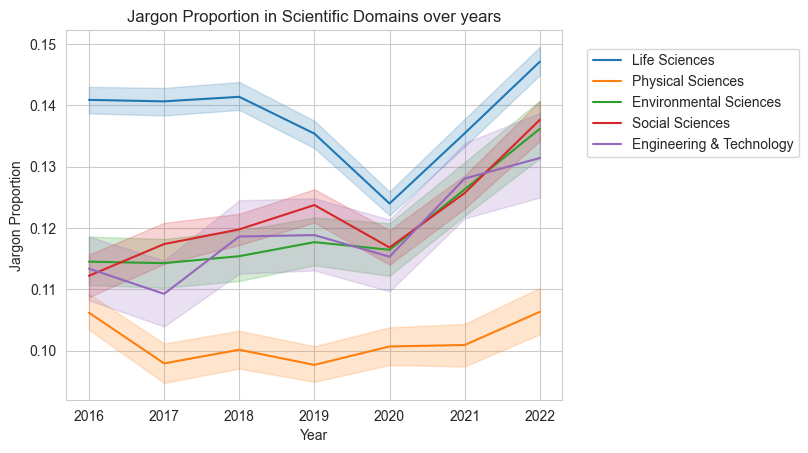

In [4]:
pal_id = "Set2"

sns_plot = sns.lineplot(data=df, x="year", y="jargon_proportion", hue="top_category")

sns_plot.legend(bbox_to_anchor=(1.05, .95), loc='upper left', borderaxespad=0.)
plt.title("Jargon Proportion in Scientific Domains over years")
plt.xlabel("Year")
plt.ylabel("Jargon Proportion")




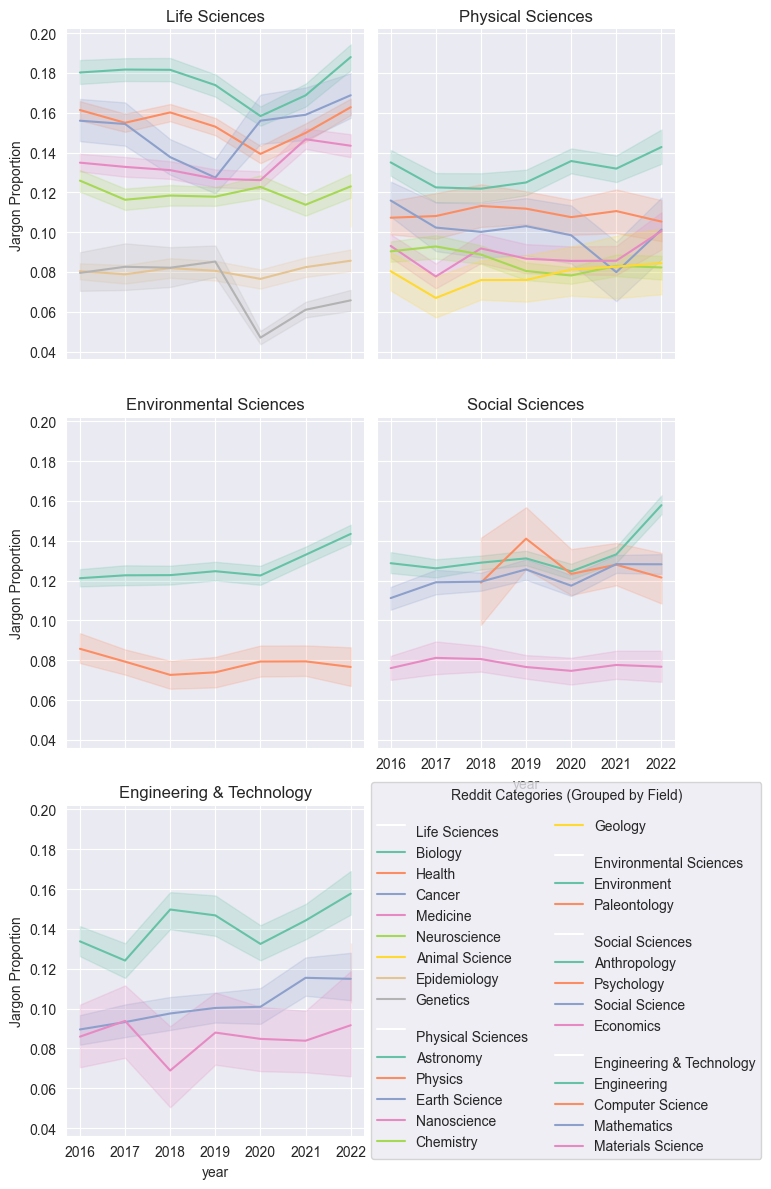

In [233]:
g = sns.FacetGrid(df, col="top_category", col_wrap=2, height=4, sharey=True)

def plot_table(data, color, **kwargs):
    average_jargon = data.groupby("link_flair_text")["jargon_proportion"].mean().sort_values(ascending=False)
    top_category = data["top_category"].iloc[0]
    palette = sns.color_palette(pal_id, len(average_jargon))
    sns_plot = sns.lineplot(data=data, x="year", y="jargon_proportion", hue="link_flair_text", **kwargs, legend=False, palette=palette,hue_order=average_jargon.index)
    sns_plot.legend(title=top_category, loc="upper right", handles = [ plt.Line2D([], [], color=palette[i], label=flair) for (i, flair) in enumerate(average_jargon.index)])
    sns_plot.set_title(top_category)
    plt.ylabel("Jargon Proportion")

    

g.map_dataframe(plot_table)
unique_top_categories = df["top_category"].unique()
# Create a custom legend
handles = []
for i, cat in enumerate(unique_top_categories):
    flairs = df[df["top_category"] == cat]["link_flair_text"].unique()
    handles.append(plt.Line2D([], [], color="white", label=f"\n{cat}"))
    palette = sns.color_palette(pal_id, len(flairs))
    for i, flair in enumerate(flairs):
        handles.append(
            plt.Line2D([], [], color=palette[i], label=flair)
        )

plt.legend(handles=handles, title="Reddit Categories (Grouped by Field)", loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)
plt.subplots_adjust(right=0.85)

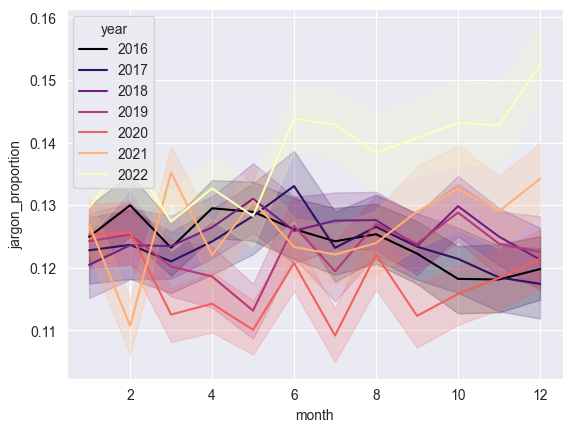

In [166]:
sns_plot = sns.lineplot(data=df, x="month", y="jargon_proportion", hue="year", palette="magma")

# Jargon Propotion over different categories 

/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/3164851801.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df, x="top_category", y="jargon_proportion", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/3164851801.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


<Axes: title={'center': 'Average Jargon Proportion by Reddit Category'}, xlabel='Category', ylabel='Average Jargon Proportion'>

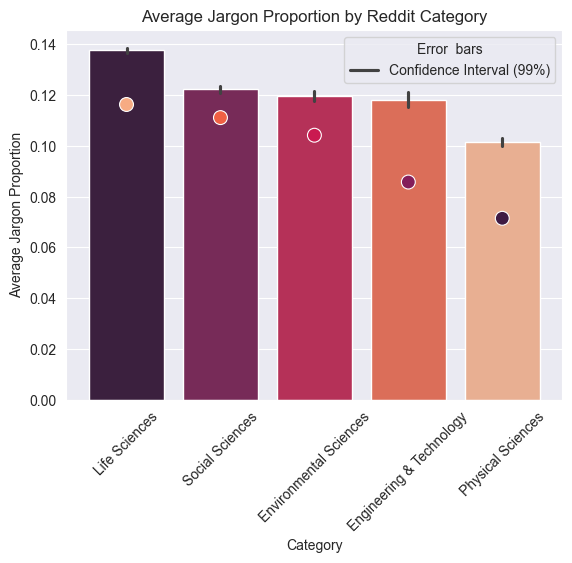

In [274]:
average_jargon = df.groupby("top_category")["jargon_proportion"].mean().sort_values(ascending=False)
median_jargon = df.groupby("top_category")["jargon_proportion"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "top_category": median_jargon.index,
    "median_jargon_proportion": median_jargon.values
})

plot = sns.barplot(data=df, x="top_category", y="jargon_proportion", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Average Jargon Proportion by Reddit Category")
# add legend for error
plt.legend(title="Error  bars", loc="upper right", labels=["Confidence Interval (99%)"])
plt.xlabel("Category")
plt.ylabel("Average Jargon Proportion")
# add a dot for the median in this
sns.scatterplot(data=median_df, x="top_category", y="median_jargon_proportion", s=100, hue="top_category", palette="rocket_r", legend=False)

/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/12603995.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df, x="link_flair_text", y="jargon_proportion", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/12603995.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


<Axes: title={'center': 'Average Jargon Proportion by Reddit Category'}, xlabel='Category', ylabel='Average Jargon Proportion'>

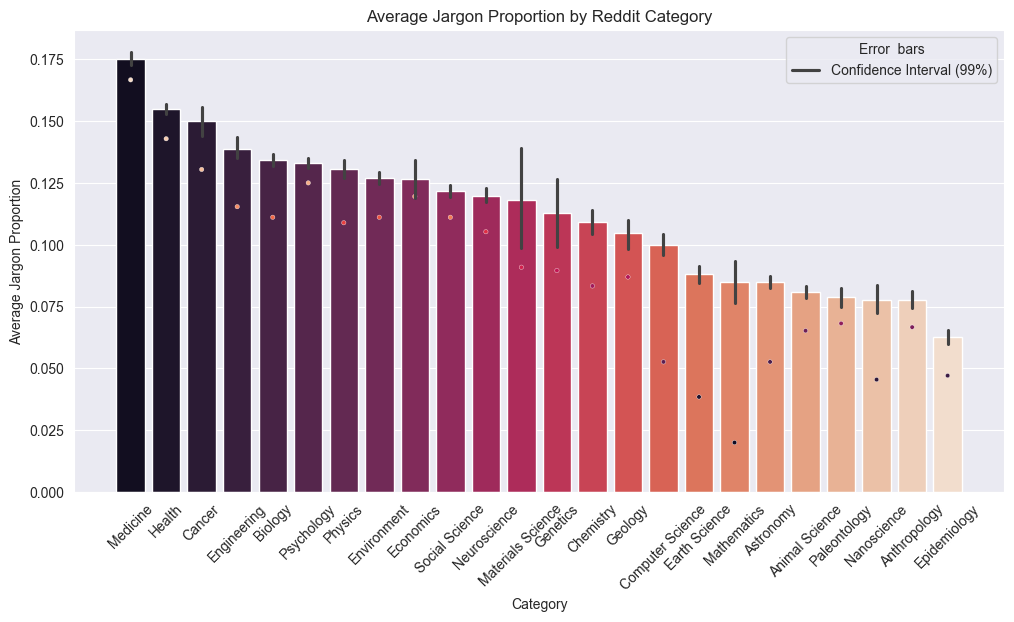

In [275]:
plt.figure(figsize=(12, 6))
average_jargon = df.groupby("link_flair_text")["jargon_proportion"].mean().sort_values(ascending=False)
median_jargon = df.groupby("link_flair_text")["jargon_proportion"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "link_flair_text": median_jargon.index,
    "median_jargon_proportion": median_jargon.values
})

plot = sns.barplot(data=df, x="link_flair_text", y="jargon_proportion", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Average Jargon Proportion by Reddit Category")
# add legend for error
plt.legend(title="Error  bars", loc="upper right", labels=["Confidence Interval (99%)"])
plt.xlabel("Category")
plt.ylabel("Average Jargon Proportion")
# add a dot for the median in this
sns.scatterplot(data=median_df, x="link_flair_text", y="median_jargon_proportion", s=10, hue="link_flair_text", palette="rocket_r", legend=False)

/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/1760044738.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(data=df, x="link_flair_text", y="score", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
/var/folders/mj/c1h2qjbd7xxbxxm05x_mmd580000gn/T/ipykernel_18017/1760044738.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=45)


<Axes: title={'center': 'Average Score by Reddit Category'}, xlabel='Category', ylabel='Average Score'>

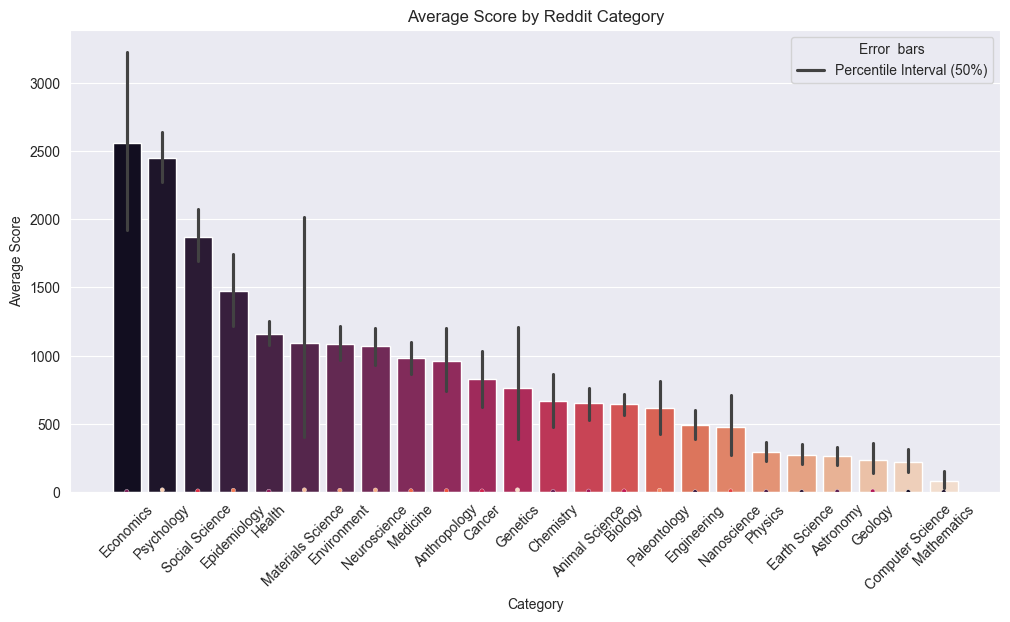

In [273]:
plt.figure(figsize=(12, 6))
average_jargon = df.groupby("link_flair_text")["score"].mean().sort_values(ascending=False)
median_jargon = df.groupby("link_flair_text")["score"].median().sort_values(ascending=False)
median_df = pd.DataFrame({
    "link_flair_text": median_jargon.index,
    "median_jargon_proportion": median_jargon.values
})

plot = sns.barplot(data=df, x="link_flair_text", y="score", errorbar=("ci", 99),  order=average_jargon.index, palette="rocket")
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.title("Average Score by Reddit Category")
# add legend for error
plt.legend(title="Error  bars", loc="upper right", labels=["Percentile Interval (50%)"])
plt.xlabel("Category")
plt.ylabel("Average Score")
# add a dot for the median in this
sns.scatterplot(data=median_df, x="link_flair_text", y="median_jargon_proportion", s=10, hue="link_flair_text", palette="rocket_r", legend=False)

# Jargon Distribution

Text(0.5, 1.0, 'Power-Law Distribution of Scores')

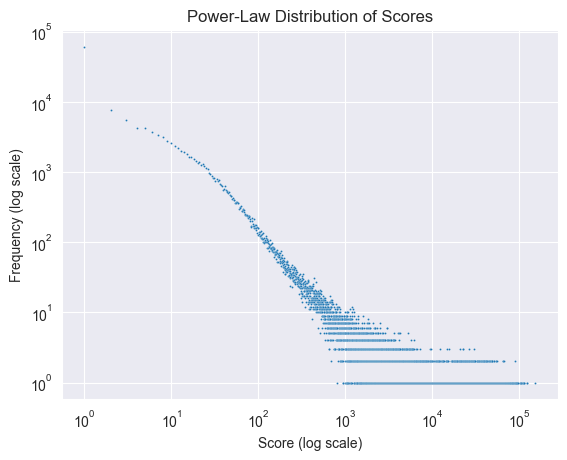

In [203]:
score_distribution = df['score'].value_counts().sort_index()
sns.scatterplot( x = score_distribution.index, y =  score_distribution.values, s=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Score (log scale)')
plt.ylabel('Frequency (log scale)')
plt.title('Power-Law Distribution of Scores')

Text(0.5, 1.0, 'Distribution of Jargon Proportion')

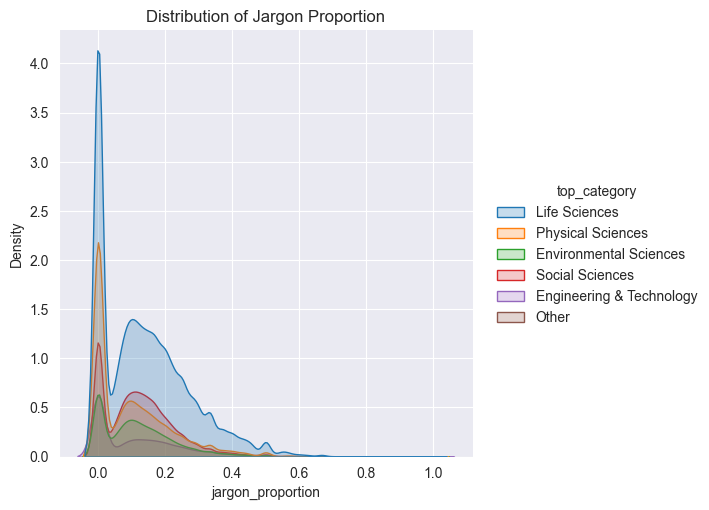

In [53]:
sns.displot(df, x = "jargon_proportion", kind="kde", fill=True, hue="top_category")
plt.title('Distribution of Jargon Proportion')

 # Jargon regression and scatters

Text(0.5, 29.140624999999986, 'Jargon Proportion')

<Figure size 1200x600 with 0 Axes>

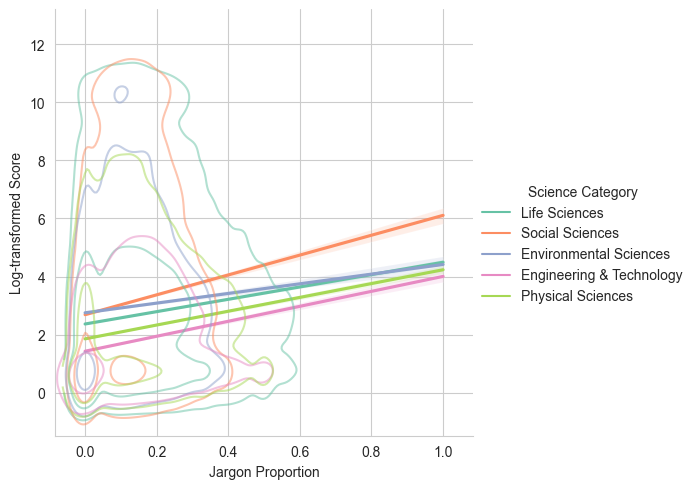

In [11]:
plt.figure(figsize=(12, 6))
sns_plot = sns.lmplot(data=df, x="jargon_proportion", y="log_score", hue="top_category", hue_order=top_categories_order, legend=False, palette=pal_id, scatter=False)
sns.kdeplot(data=df, x="jargon_proportion", y="log_score", levels=3, alpha=0.5, legend=False, hue_order=top_categories_order, hue="top_category", palette=pal_id)
handles = [plt.Line2D([], [], color=sns.color_palette(pal_id, len(domain_order_for_hue))[i], label=domain) for i, domain in enumerate(top_categories_order)]
sns_plot.add_legend(title="Science Category", handles=handles)
plt.ylabel("Log-transformed Score")
plt.xlabel("Jargon Proportion")

<Figure size 1200x600 with 0 Axes>

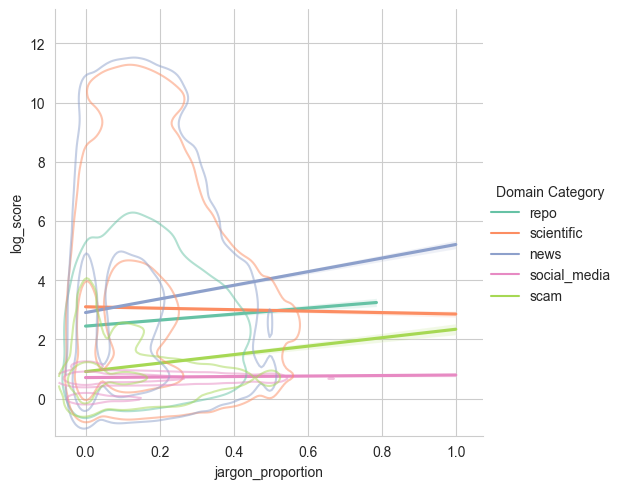

In [6]:
plt.figure(figsize=(12, 6))
sns_plot = sns.lmplot(data=df, x="jargon_proportion", y="log_score", hue="label_voting_manual", hue_order=domain_order_for_hue, legend=False, palette=pal_id, scatter=False)
sns.kdeplot(data=df, x="jargon_proportion", y="log_score", levels=3, alpha=0.5, legend=False, hue_order=domain_order_for_hue, hue="label_voting_manual", palette=pal_id)
handles = [plt.Line2D([], [], color=sns.color_palette(pal_id, len(domain_order_for_hue))[i], label=domain) for i, domain in enumerate(domain_order_for_hue)]
sns_plot.add_legend(title="Domain Category", handles=handles)
plt.ylabel("Log-transformed Score")
plt.xlabel("Jargon Proportion")


/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = cont

Text(0.5, 0.98, 'Jargon vs. Log-transformed Score by Category')

<Figure size 1200x600 with 0 Axes>

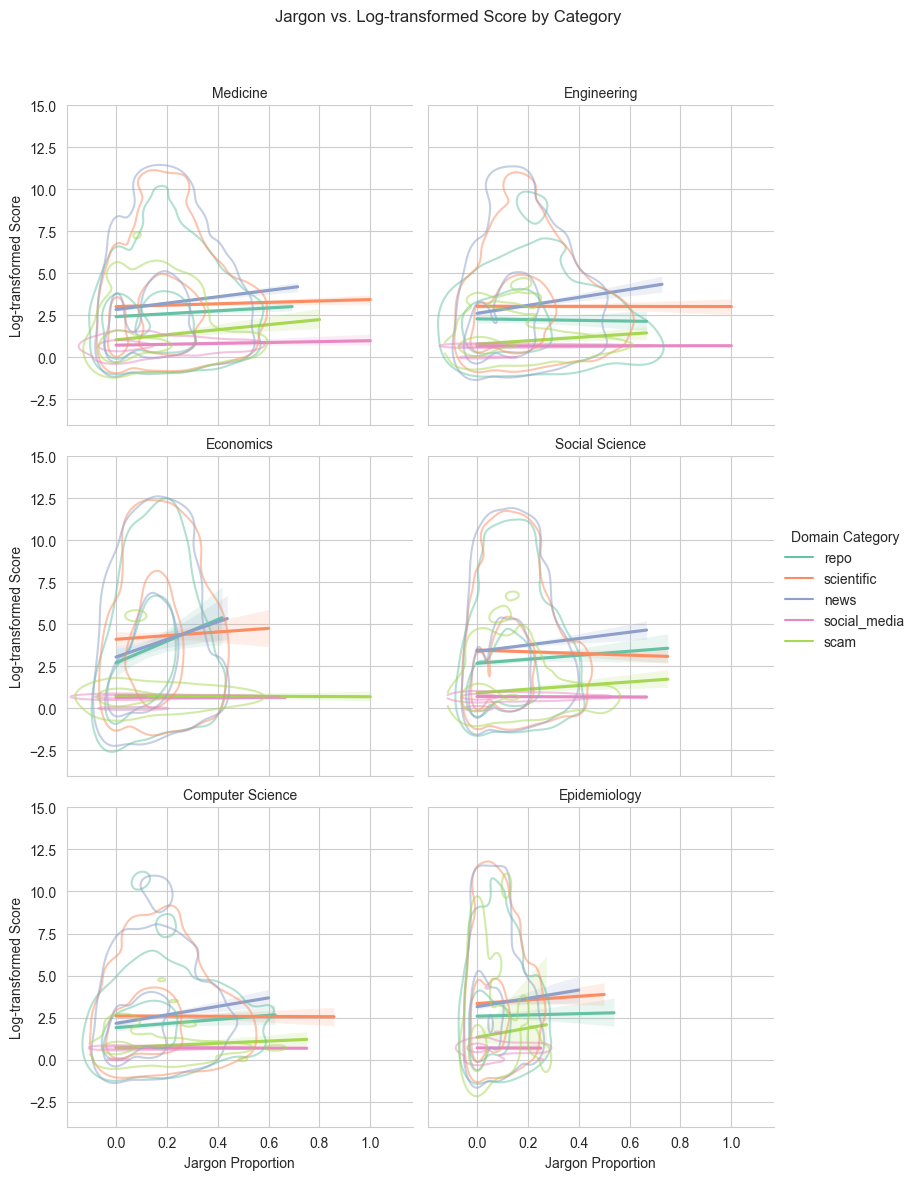

In [10]:
filtered_df = df[df["link_flair_text"].isin(selected_categories)]
plt.figure(figsize=(12, 6))
# Create a faceted plot with separate plots for each category
sns_plot = sns.lmplot(data=filtered_df, x="jargon_proportion", y="log_score", col="link_flair_text", col_order=selected_categories, col_wrap=2, height=4, hue="label_voting_manual", hue_order=domain_order_for_hue, palette=pal_id, legend=False, scatter=False)

sns_plot.map(sns.kdeplot, "jargon_proportion", "log_score", levels=3, alpha=0.5, legend=False)

# Set axis labels for clarity
sns_plot.set_axis_labels("Jargon Proportion", "Log-transformed Score")
sns_plot.set_titles("{col_name}")

# Add a legend
handles = [plt.Line2D([], [], color=sns.color_palette(pal_id, len(domain_order_for_hue))[i], label=domain) for i, domain in enumerate(domain_order_for_hue)]
sns_plot.add_legend(title="Domain Category", loc="center right", handles=handles )

# Show the plot
# add some space above
plt.subplots_adjust(top=0.9)

sns_plot.fig.suptitle("Jargon vs. Log-transformed Score by Category")

/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = contour_func(
/Users/julianstrietzel/UCB/algorithmic-media/venv/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'marker'
  cset = cont

Text(0.5, 0.98, 'Jargon vs. Log-transformed Score by Category')

<Figure size 1200x600 with 0 Axes>

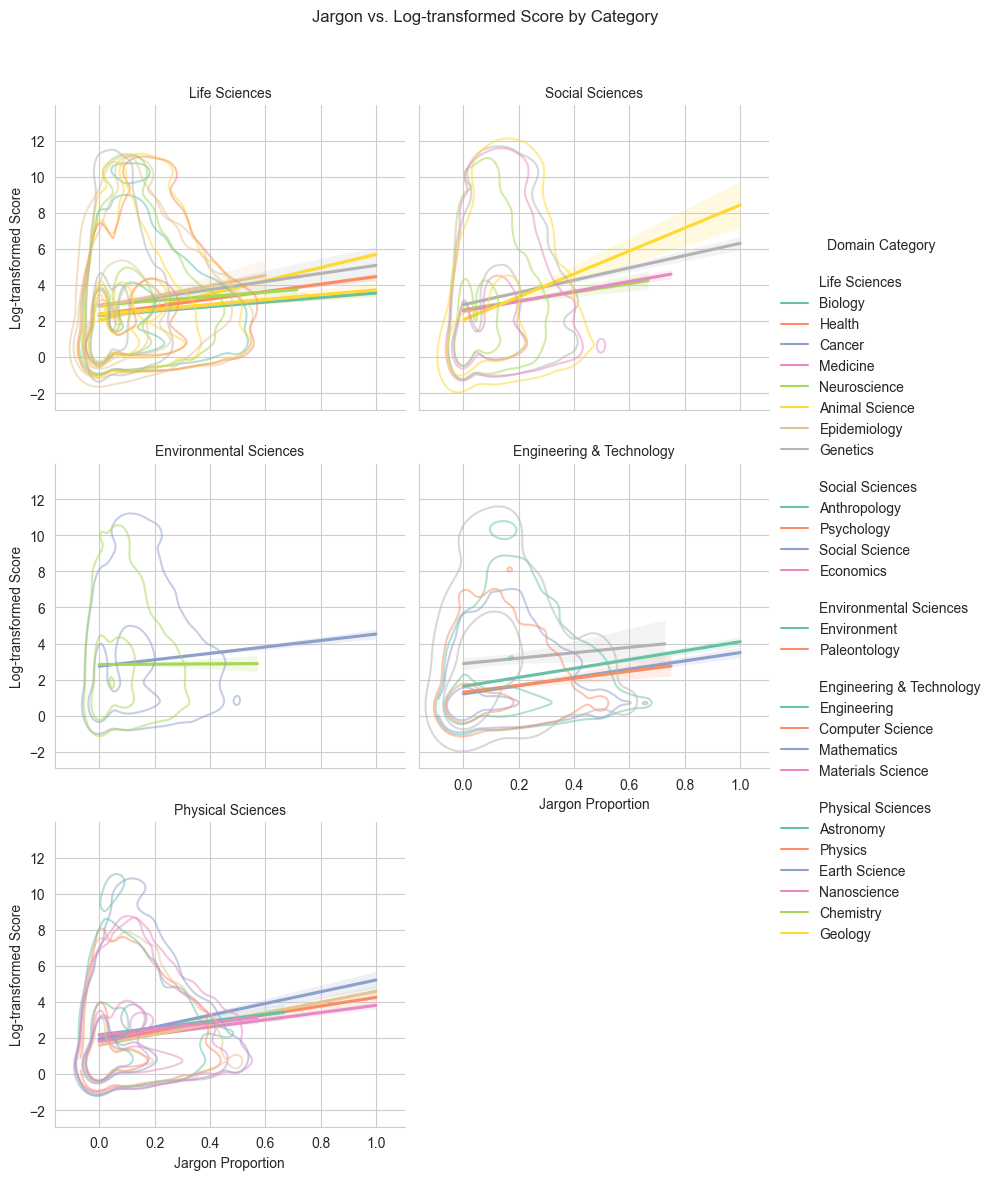

In [18]:
plt.figure(figsize=(12, 6))
# Create a faceted plot with separate plots for each category
sns_plot = sns.lmplot(data=df, x="jargon_proportion", y="log_score", col="top_category", col_order=top_categories_order, col_wrap=2, height=4, hue="link_flair_text", palette=pal_id, legend=False, scatter=False)

sns_plot.map(sns.kdeplot, "jargon_proportion", "log_score", levels=3, alpha=0.5, legend=False)

# Set axis labels for clarity
sns_plot.set_axis_labels("Jargon Proportion", "Log-transformed Score")
sns_plot.set_titles("{col_name}")

# Add a legend

handles = []
for cate in top_categories_order:
    flairs = df[df["top_category"] == cate]["link_flair_text"].unique()
    # add sub header:
    handles.append(plt.Line2D([], [], color="white", label=f"\n{cate}"))
    handles.extend([plt.Line2D([], [], color=sns.color_palette(pal_id, len(flairs))[i], label=flair) for i, flair in enumerate(flairs)])
sns_plot.add_legend(title="Domain Category", loc="center right", handles=handles )

# Show the plot
# add some space above
plt.subplots_adjust(top=0.9)

sns_plot.fig.suptitle("Jargon vs. Log-transformed Score by Category")

NameError: name 'palette' is not defined

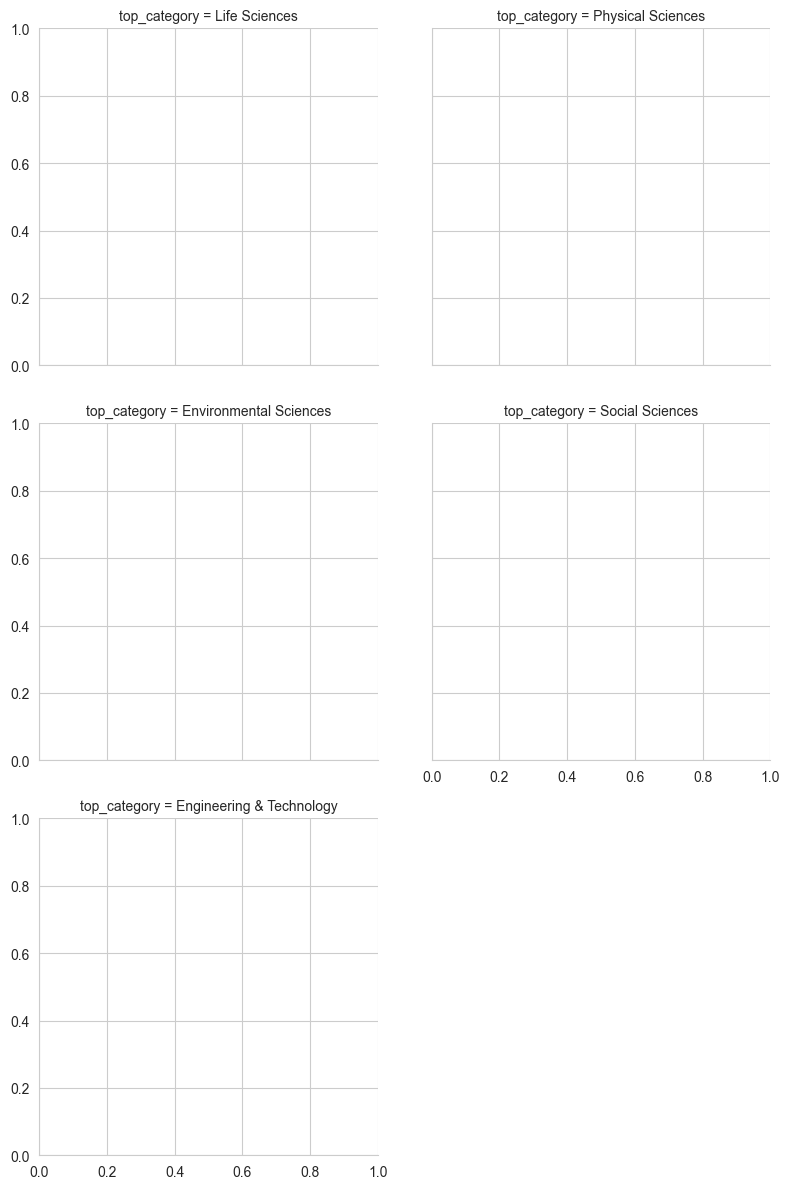

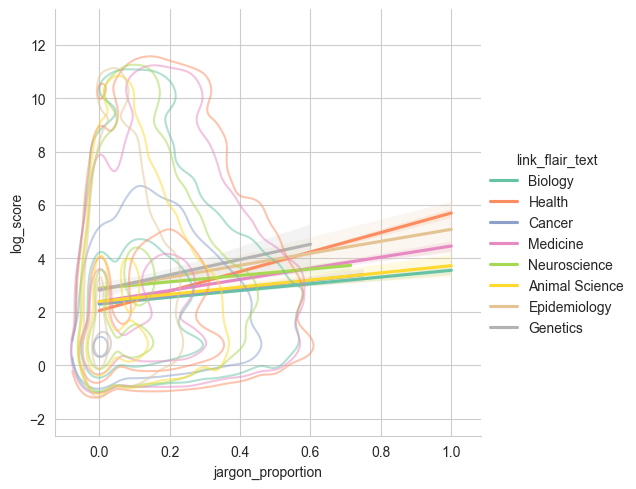

In [20]:
g = sns.FacetGrid(df, col="top_category", col_wrap=2, height=4, sharey=True)

def plot_table(data, color, **kwargs):
    top_category = data["top_category"].iloc[0]
    link_flairs = data["link_flair_text"].unique()
    sns_plot = sns.lmplot(data=data, x="jargon_proportion", y="log_score", hue="link_flair_text", palette=pal_id, scatter=False)
    sns.kdeplot(data= data, x= "jargon_proportion",y= "log_score", levels=3, alpha=0.5, legend=False, hue="link_flair_text", palette=pal_id)
    sns_plot.legend(title=top_category, loc="upper right", handles = [ plt.Line2D([], [], color=palette[i], label=flair) for (i, flair) in enumerate(link_flairs)])
    sns_plot.set_title(top_category)
    plt.ylabel("Log-transformed Score")
    plt.xlabel("Jargon Proportion")

    

g.map_dataframe(plot_table)
unique_top_categories = df["top_category"].unique()
# Create a custom legend
handles = []
for i, cat in enumerate(unique_top_categories):
    flairs = df[df["top_category"] == cat]["link_flair_text"].unique()
    handles.append(plt.Line2D([], [], color="white", label=f"\n{cat}"))
    palette = sns.color_palette(pal_id, len(flairs))
    for i, flair in enumerate(flairs):
        handles.append(
            plt.Line2D([], [], color=palette[i], label=flair)
        )

plt.legend(handles=handles, title="Reddit Categories (Grouped by Field)", loc="center left", bbox_to_anchor=(1, 0.5), ncol=2)
plt.subplots_adjust(right=0.85)

In [17]:
handles = []
for cate in top_categories_order:
    flairs = df[df["top_category"] == cate]["link_flair_text"].unique()
    # add sub header:
    handles.append(plt.Line2D([], [], color="white", label=f"\n{cate}"))
    handles.extend([plt.Line2D([], [], color=sns.color_palette(pal_id, len(flairs))[i], label=flair) for i, flair in enumerate(flairs)])
sns_plot.add_legend(title="Domain Category", loc="center right", handles=handles )
sns_plot.add_legend(title="Domain Category", loc="center right", handles=handles )


AttributeError: 'FacetGrid' object has no attribute 'show'

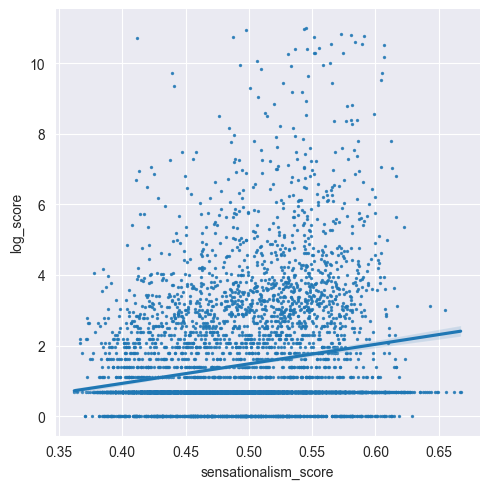

In [74]:
sns.lmplot(data=df[df["link_flair_text"] == "Computer Science"], x="sensationalism_score", y="log_score", scatter_kws={'s':2})

<Axes: xlabel='jargon_proportion', ylabel='score_plus_one'>

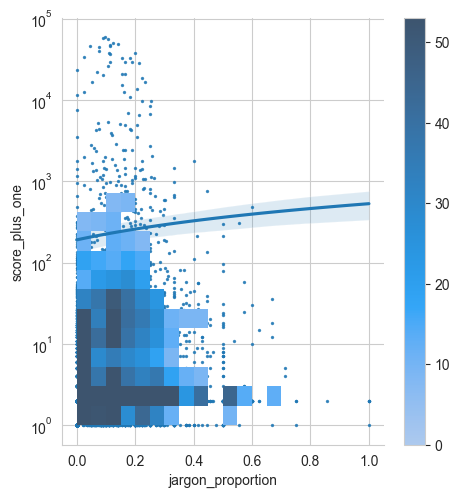

In [131]:
df["score_plus_one"] = df["score"] + 1
sns.lmplot(data=df[df["link_flair_text"] == "Computer Science"], x="jargon_proportion", y="score_plus_one", scatter_kws={'s':2})
sns.histplot(data=df[df["link_flair_text"] == "Computer Science"], x="jargon_proportion", y= "score_plus_one", bins=20, cbar=True, pmax=.3, pthresh=.05, log_scale=(False, True))